## Intro

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pickle
import os

In [2]:
# note: need to switch to using conv_added instead of conv_cumsum for lcp
# not: additionally need to change all 30s to 20s for lcp5 (since it hasn't finished yet)


In [3]:
def find_directories_ending_with(path, suffix):
    """Find all directories in a given path that end with a specified suffix."""
    result = []

    for dirpath, dirnames, filenames in os.walk(path):
        for dirname in dirnames:
            # print(dirname)
            if dirname.endswith(suffix):
                result.append(os.path.join(dirpath, dirname))

    return result

Averages

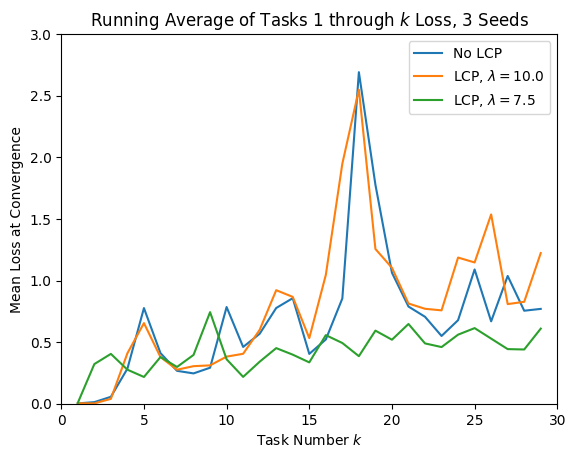

In [5]:
task_total = 30
added = True
nseeds = 3

plt.figure(facecolor='white')
plt.xlabel("Task Number $k$")
plt.ylabel("Mean Loss at Convergence")
plt.title(f"Running Average of Tasks 1 through $k$ Loss, {nseeds} Seeds")
plt.xlim([0,30])
plt.ylim([0,3])

for save_name, print_name in zip(['plain', 'lcp10.0', '7.5'], ['No LCP', 'LCP, $λ=10.0$', 'LCP, $λ=7.5$']):

    means = np.zeros((task_total-1,))

    # save_name = save_dir.split('_')[1]
    for i in range(nseeds):
        save_dir = find_directories_ending_with('../data/', save_name+'s'+str(i))[0]

        # Get convergence numbers
        conv_f = os.path.join('..', 'data', save_dir, 'conv.txt')
        conv = np.loadtxt(conv_f)


        perfs_f = os.path.join('..', 'data', save_dir, 'perfs', f'{task_total}.pkl')

        with open(perfs_f,'rb') as fp:
            perfs = pickle.load(fp)

        conv_cumsum = np.cumsum(conv)
        if added and not (save_name == 'plain' and i == 0):
            addition = np.arange(50, 50*(len(conv)+1), 50)
            conv_cumsum = conv_cumsum + addition 

        for k in range(task_total-1):
            kth_conv_trial = conv_cumsum[k] 
            kth_conv_trial_idx = perfs['trials'].index(kth_conv_trial)

            perf_taskbytrial = np.array([np.mean(np.array(perfs[i]),axis=1) for i in range(k+1)])
            # take the mean of the performance on each of the k tasks at the kth convergence trial
            means[k] += np.mean(perf_taskbytrial[:,kth_conv_trial_idx])

    means /= nseeds
    plt.plot(range(1, task_total), means, label=f"{print_name}")

plt.legend()
plt.show()

Medians

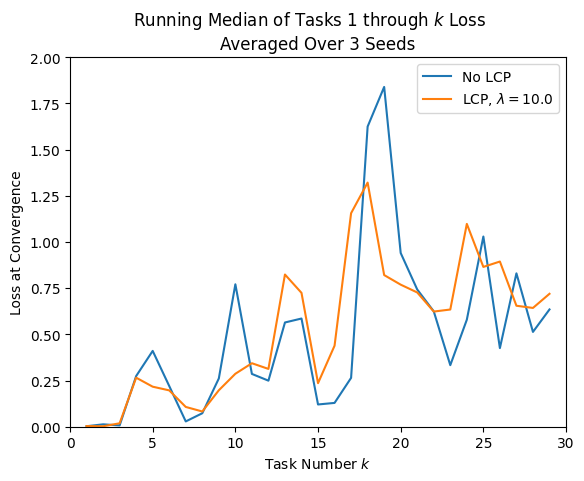

In [72]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

task_total = 30
added = True
nseeds = 3

plt.figure(facecolor='white')
plt.xlabel("Task Number $k$")
plt.ylabel("Loss at Convergence")
plt.suptitle(f"Running Median of Tasks 1 through $k$ Loss")
plt.title(f"Averaged Over {nseeds} Seeds")
plt.xlim([0,30])
plt.ylim([0,2])

for save_name, print_name in zip(['plain', 'lcp10.0', 'lcp7.5'], ['No LCP', 'LCP, $λ=10.0$', 'LCP, $λ=7.5$']):

    # Store the results for each seed separately
    means_for_each_seed = np.zeros((task_total-1, nseeds))

    for i in range(nseeds):
        save_dir = find_directories_ending_with('../data/', save_name+'s'+str(i))[0]

        # Get convergence numbers
        conv_f = os.path.join('..', 'data', save_dir, 'conv.txt')
        conv = np.loadtxt(conv_f)

        perfs_f = os.path.join('..', 'data', save_dir, 'perfs', f'{task_total}.pkl')
        with open(perfs_f,'rb') as fp:
            perfs = pickle.load(fp)

        conv_cumsum = np.cumsum(conv)
        if added and not (save_name == 'plain' and i == 0):
            addition = np.arange(50, 50*(len(conv)+1), 50)
            conv_cumsum = conv_cumsum + addition 

        for k in range(task_total-1):
            kth_conv_trial = conv_cumsum[k] 
            kth_conv_trial_idx = perfs['trials'].index(kth_conv_trial)

            perf_taskbytrial = np.array([np.mean(np.array(perfs[i]),axis=1) for i in range(k+1)])
            # store the mean performance for this seed
            means_for_each_seed[k, i] = np.median(perf_taskbytrial[:,kth_conv_trial_idx])

    # Now, take the mean across seeds
    means = np.mean(means_for_each_seed, axis=1)
    plt.plot(range(1, task_total), means, label=f"{print_name}")

plt.legend()
plt.show()


## Check if images are the same -- success, they are not

In [39]:

import numpy as np
import os
import glob

def find_file_in_pattern(directory_pattern, filename):
    """Find the specified file in directories matching the pattern."""
    directories = glob.glob(directory_pattern)
    
    for directory in directories:
        filepath = os.path.join(directory, filename)
        if os.path.exists(filepath):
            return filepath
    
    return None

# Define the search pattern and filename
dir_pattern = '../data/*10.0s2'
filename = 'images_all.npy'

# Search for the file
file_path = find_file_in_pattern(dir_pattern, filename)

if file_path:
    # Load the .npy file
    data = np.load(file_path)
    print(f"Loaded data from {file_path} with shape {data.shape}")
    print(data[0][0])
else:
    print(f"{filename} not found in any directory matching the pattern.")

Loaded data from ../data/2023-10-07T23:33:27_lcp10.0s2/images_all.npy with shape (31, 2, 10)
[-0.10723241 -0.01447754 -0.54964644  0.42204413 -0.46145365 -0.21658285
  0.12939213 -0.32041448 -0.27221265 -0.23388901]
